<a href="https://colab.research.google.com/github/AlexandreXavierMartins/PST/blob/main/GRASP_PST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Média =  75.95


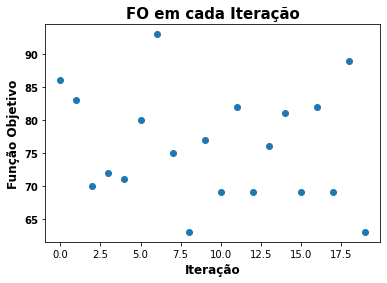

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt


def gera_sol_grasp(sol, n, alpha, tempos):
  flag = n*[0]
  flag[0] = 1 #Indica que a tarefa ZERO já está alocada
  for i in range(1, n): #Para cada posição do vetor SOL aloca uma tarefa
    anterior = sol[i-1] #recebe a última tarefa alocada
    maior = -math.inf
    menor = math.inf
    for j in range(1, n):    #Percorre as tarefas
      if(flag[j] == 0): #Somente para as não alocadas
        if(tempos[j][anterior] < menor):
          menor = tempos[j][anterior]
        if(tempos[j][anterior] > maior):
          maior = tempos[j][anterior]
          
    limite = menor + alpha*(maior - menor)
    LRC = []
    for j in range(1, n):
      if(flag[j] == 0):
        if(tempos[j][anterior] <= limite):
          LRC.append(j)
    #print(LRC)
    if len(LRC) > 0:
      j = np.random.randint(0, len(LRC))
      #print(LRC)
      #print('Sorteado ', LRC[j])
      sol[i] = LRC[j]
      flag[LRC[j]] = 1
      #print(sol)
    else: return sol
  return sol

#CALCULA O VALOR DE UMA SOLUÇÃO
def calcula_fo(sol, n, tempos):
  fo = 0
  for i in range(1, n):
    fo = fo + tempos[sol[i]][sol[i-1]]
  return fo

#CALCULA O VALOR DE UMA SOLUÇÃO
def calcula_fo(sol, tempos, n):
  fo = 0
  for i in range(1, n):
    fo = fo + tempos[sol[i]][sol[i-1]]
  return fo

def melhor_vizinho(sol, tempos, n):
  best = math.inf
  for i in range(1, n-1):
    for j in range(i+1, n):
      aux = sol[i]
      sol[i] = sol[j]
      sol[j] = aux
      fo = calcula_fo(sol, tempos, n)
      sol[j] = sol[i]
      sol[i] = aux
      if(fo < best):
        best = fo
        bi = i
        bj = j
  return bi, bj, best

def busca_local(sol, tempos, n):
  flag = 1
  fo = calcula_fo(sol, tempos, n)
  while flag == 1:
    flag = 0
    i, j, val = melhor_vizinho(sol, tempos, n)
    if val < fo:
      aux = sol[i]
      sol[i] = sol[j]
      sol[j] = aux
      fo = val
      flag = 1
      #print(sol)
      #print(fo)
  return sol, fo

#DADOS DO PROBLEMA-----------------------------------------------------------------#
#Ótimo = 63 (Tenho que conferir)
n = 11
tempos = [
           [1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0,	1000.0],	
           [50.0,	1000.0,	13.0,	40.0,	21.0,	2.0,	8.0,	15.0,	24.0,	37.0,	4.0],	
           [34.0,	6.0,	1000.0,	14.0,	21.0,	31.0,	21.0,	12.0,	42.0,	1.0,	9.0],	
           [48.0,	5.0,	43.0,	1000.0,	45.0,	43.0,	37.0,	28.0,	20.0,	36.0,	20.0],	
           [38.0,	44.0,	7.0,	3.0,	1000.0,	21.0,	24.0,	44.0,	48.0,	24.0,	4.0],	
           [46.0,	11.0,	46.0,	25.0,	13.0,	1000.0,	3.0,	35.0,	37.0,	22.0,	27.0],	
           [22.0,	2.0,	32.0,	29.0,	23.0,	42.0,	1000.0,	10.0,	32.0,	33.0,	31.0],	
           [41.0,	10.0,	15.0,	49.0,	44.0,	37.0,	5.0,	1000.0,	50.0,	25.0,	22.0],	
           [16.0,	12.0,	10.0,	29.0,	16.0,	50.0,	49.0,	14.0,	1000.0,	25.0,	49.0],	
           [5.0,	19.0,	49.0,	6.0,	23.0,	8.0,	16.0,	46.0,	46.0,	1000.0,	24.0],	
           [50.0,	28.0,	4.0,	50.0,	26.0,	1.0,	37.0,	23.0,	34.0,	39.0,	1000.0]
           ] 
#-------------------------------------------------------------------------------#
#ESTATÍSTICAS------------------------#
#fo_inicial = []
fo_final = []
xlabel = []
media = 0
#------------------------------------#
#PARÂMETROS--------------------------#
#np.random.seed(10000)
itermax = 10
alpha = 0.5
#------------------------------------#

experimentos = 20
for i in range(experimentos):
  xlabel.append(i)
  sol_star = n*[0]
  fo_star = +math.inf
  for j in range(itermax):
    sol = n*[0]
    sol = gera_sol_grasp(sol, n, alpha, tempos)
    sol, fo = busca_local(sol, tempos, n)
    if fo < fo_star:
      fo_star = fo
      for k in range(1, n):
        sol_star[k] = sol[k]
  
  media = media+fo_star
  fo_final.append(fo_star)


media = media/experimentos
#print('Melhor solução = ', fo_star)
#print('Melhor iteração =', best_iter)
print('Média = ', media)
#plt.scatter(xlabel, fo_inicial)
plt.scatter(xlabel, fo_final)
plt.title("FO em cada Iteração", fontsize = 15, fontweight = 'bold')
plt.xlabel("Iteração", fontsize = 12, fontweight = 'bold')
plt.ylabel("Função Objetivo", fontsize = 12, fontweight = 'bold')
plt.yticks(fontweight='bold')
plt.show()
